# Week 2 (K-means, K-medoids, Gaussian Mixtures)

This week we are going to work with K-means, K-medoids, and Gaussian Mixtures.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Local imports (used for the last optional exercise.)
import math
import itertools
import sys
sys.path.append("./utilities")
from load_data import load_iris, load_iris_PC, index_to_feature
from utilities.gmm import GMM

## Exercise 1: Warmup
Please provide a brief description of what characterises 
1. Clustering as a task 
2. Representative-based clustering as a clustering approach 

### Solution
1. Unsupervisely group the data such that: Highly similar to any other point in the cluster; Dissimilar to any other point in another cluster.
2. Use representative per cluster (mean/medoid), iterative approach to improve representation (mean/medoid plus covariances) and assignment (cluster memberships and probabilities).

## Exercise 2: Practical K-means
Given the following points: 2, 4, 10, 12, 3, 20, 30, 11, 25. Assume $k=3$, and that we randomly pick the initial means $\mu_1=2$, $ \mu_2=4$ and $\mu_3=6$. Show the clusters obtained using K-means algorithm after one iteration, and show the new means for the next iteration.

X_:
[[ 2.]
 [ 4.]
 [10.]
 [12.]
 [ 3.]
 [20.]
 [30.]
 [11.]
 [25.]]
mus:
0 [[2. 4. 6.]]
X_-mus:
[[ 0. -2. -4.]
 [ 2.  0. -2.]
 [ 8.  6.  4.]
 [10.  8.  6.]
 [ 1. -1. -3.]
 [18. 16. 14.]
 [28. 26. 24.]
 [ 9.  7.  5.]
 [23. 21. 19.]]
dists:
[[ 0.  2.  4.]
 [ 2.  0.  2.]
 [ 8.  6.  4.]
 [10.  8.  6.]
 [ 1.  1.  3.]
 [18. 16. 14.]
 [28. 26. 24.]
 [ 9.  7.  5.]
 [23. 21. 19.]]
clusters [0 1 2 2 0 2 2 2 2]

X_:
[[ 2.]
 [ 4.]
 [10.]
 [12.]
 [ 3.]
 [20.]
 [30.]
 [11.]
 [25.]]
mus:
1 [[ 2.5  4.  18. ]]
X_-mus:
[[ -0.5  -2.  -16. ]
 [  1.5   0.  -14. ]
 [  7.5   6.   -8. ]
 [  9.5   8.   -6. ]
 [  0.5  -1.  -15. ]
 [ 17.5  16.    2. ]
 [ 27.5  26.   12. ]
 [  8.5   7.   -7. ]
 [ 22.5  21.    7. ]]
dists:
[[ 0.5  2.  16. ]
 [ 1.5  0.  14. ]
 [ 7.5  6.   8. ]
 [ 9.5  8.   6. ]
 [ 0.5  1.  15. ]
 [17.5 16.   2. ]
 [27.5 26.  12. ]
 [ 8.5  7.   7. ]
 [22.5 21.   7. ]]
clusters [0 1 1 2 0 2 2 1 2]

X_:
[[ 2.]
 [ 4.]
 [10.]
 [12.]
 [ 3.]
 [20.]
 [30.]
 [11.]
 [25.]]
mus:
2 [[ 2.5         8.33333333 21

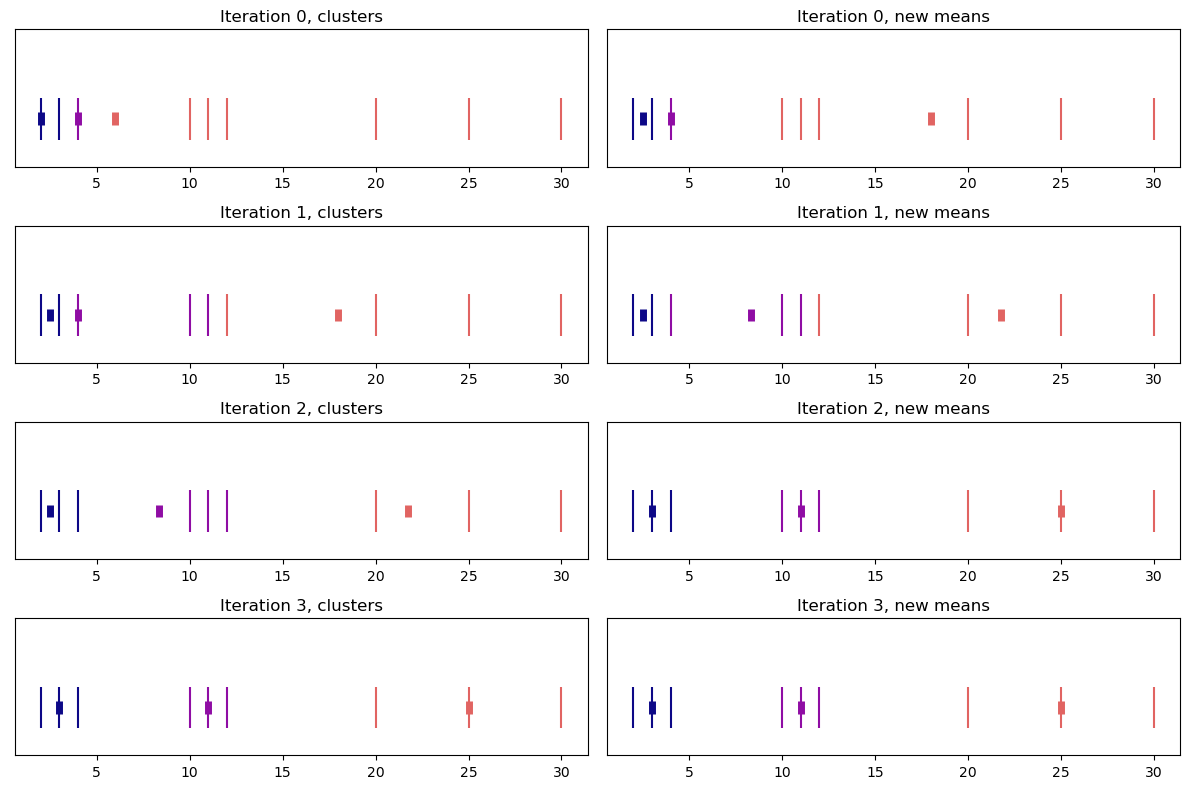

In [3]:
from matplotlib import cm
def plot(idx, mus, clusters): 
    """
        Function for plotting each iteration.
    """
        
    colormap = cm.get_cmap('plasma')
    colors = colormap([0., 0.3, 0.6])
    if idx % 2 == 0: ax[idx//2, 0].set_title("Iteration %i, clusters" % (idx//2))  # Set titles
    else:            ax[idx//2, 1].set_title("Iteration %i, new means" % (idx//2))
    ax[idx//2, idx%2].get_yaxis().set_visible(False) # Hide y-axis
    
    # Plot ponits and means from each cluster.
    for j, mu in enumerate(mus):
        ax[idx//2, idx%2].eventplot(X[clusters==j], lineoffsets=0, linelength=1, colors=[colors[j]])
        ax[idx//2, idx%2].eventplot([mu], lineoffset=0, linelength=0.3, linewidth=5, colors=colors[j])
        
 
X = np.array([2., 4., 10., 12., 3., 20., 30., 11., 25.]) #data points
mus = np.array([[2., 4., 6.]]) #initial means
# Setup
iterations = 4 #number of iterations
fig, ax = plt.subplots(iterations,2, figsize=(12,iterations*2)) #make figure   
X_ = X.reshape((X.shape[0], 1)) # Reshape X to have shape [n, 1]
for i in range(iterations): 
    print(f'X_:\n{X_}')
    print(f'mus:\n{i} {mus}')
    print(f'X_-mus:\n{X_-mus}')
    dists = np.sqrt((X_-mus)**2)
    print(f'dists:\n{dists}')
    clusters = np.argmin(dists, axis=1)
    print(f'clusters {clusters}')
    plot(i*2, mus[0], clusters)
    for j in range(mus.shape[1]): 
        mus[0,j] = X[clusters==j].mean()
    plot(i*2+1, mus[0], clusters)
    print()

fig.tight_layout()
plt.show() #plot figure   

## Exercise 3
Which algorithm is more robust: k-means or k-medoid and why? 

### Solution
Revisit robustness of mean/medoid from last week; as a consequence, the shapes of the clusters are more impacted by outliers when using k-means. (draw a small example where you add an extreme outlier and have them find mean/medoid and what would happen in the algorithm.)

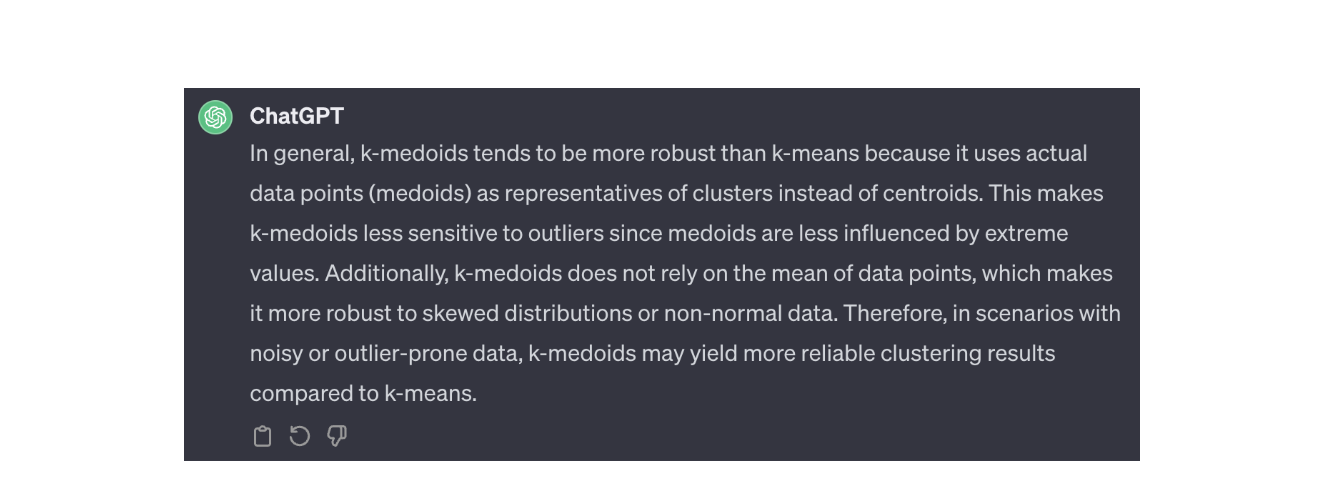

## Exercise 4: Practical Mixture of Gaussians
Given the data points in Table 13.1, and their probability of belonging to two clusters.
Assume that these points were produced by a mixture of two univariate normal distributions. 
Answer the following questions:

1. Find the maximum likelihood estimate of the means $\mu_1$ and $\mu_2$


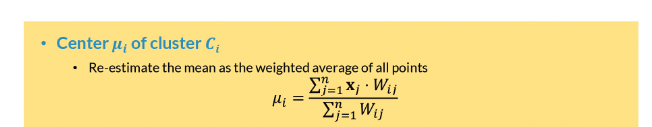

In [22]:
X            = np.array([2, 3, 7, 9, 2, 1]).reshape(-1,1)
P_C1_given_x = np.array([0.9, 0.8, 0.3, 0.1, 0.9, 0.8])
P_C2_given_x = 1 - P_C1_given_x

# TODO
# ML estimate of means
# Part 1
P = np.c_[P_C1_given_x, P_C2_given_x] # Probs of shape  [n, 2]
mus = (X * P).sum(0) / P.sum(axis=0)

print(f'X:\n {X}')
print(f'Probabilities:\n {P}')
print(f'X*P:\n{(X * P)}')
print(f'(X * P).sum(0):\n{(X * P).sum(0)}')
print(f'P.sum(axis=0):\n{P.sum(axis=0)}')
print(f'Maximum Likelihood Estimate of means:\n {mus}')

X:
 [[2]
 [3]
 [7]
 [9]
 [2]
 [1]]
Probabilities:
 [[0.9 0.1]
 [0.8 0.2]
 [0.3 0.7]
 [0.1 0.9]
 [0.9 0.1]
 [0.8 0.2]]
X*P:
[[1.8 0.2]
 [2.4 0.6]
 [2.1 4.9]
 [0.9 8.1]
 [1.8 0.2]
 [0.8 0.2]]
(X * P).sum(0):
[ 9.8 14.2]
P.sum(axis=0):
[3.8 2.2]
Maximum Likelihood Estimate of means:
 [2.57894737 6.45454545]


2. Assume that $\mu_1 = 2$, $\mu_2 = 7$, and $\sigma_1 = \sigma_2 = 1$. Fint the probability that the point $x=5$ belongs to cluster $C_1$ and to cluster $C_2$. You may assume that the prior probability of each cluster is equal (i.e., $P(C_1) = P(C_2) = 0.5$), and the prior probability $P(x=5) = 0.029$


|$x$|$P(C_1\mid x)$|$P(C_2\mid x)$|
|:---:|:---:|:---:|
| --- | ---------------- | ---------------- |
|2 |  0.9  |  0.1  |
|3|0.8|0.2|
|7|0.3|0.7|
|9|0.1|0.9|
|2|0.9|0.1|
|1|0.8|0.2|


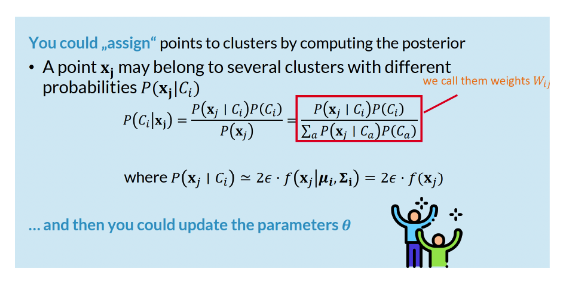

In [14]:
# Part 2
x = 5
mus = np.array([2., 7.])
std = np.array([1., 1.])

#P(x|C)
P_x_given_C1 = norm.pdf(x, loc=mus[0], scale=std[0])
P_x_given_C2 = norm.pdf(x, loc=mus[1], scale=std[1])
#P(C)
P_C1 = 0.5
P_C2 = 0.5
#P(x)
P_x = 0.029 
#P(C|x)
P_C1_given_x = (P_x_given_C1*P_C1)/P_x 
P_C2_given_x = (P_x_given_C2*P_C2)/P_x

print(f'Posterior probabilities: P(C1|x)={P_C1_given_x}, P(C2|x)={P_C2_given_x}')
assert np.allclose(1, P_C1_given_x + P_C2_given_x, atol=0.01), "Should sum to 1."

Posterior probabilities: P(C1|x)=0.07641117951617254, P(C2|x)=0.930878732986001


## Exercise 5
For which parameter $\mu,\Sigma,P(C)$ settings is EM clustering identical to k-means clustering and why?<br>
Mean $\mu_i = \frac{{\sum_{j=1}^{n}{x_j} w_{ij}}}{\sum_{j=1}^{n}{w_{ij}}}$<br>
Covariance $\Sigma_i = \frac{\sum_{j=1}^{n}w_{ij}(x_j - \mu_i)(x_j - \mu_i)^\top}{\sum_{j=1}^{n} w_{ij}}$<br>
Prior $P(c_i) = \frac{\sum_{j=1}^{n}w_{ij}}{n}$<br>

### Solution
Note that the formulas are not too far from k-means. In fact, since in k-means a point is either assigned or not to a single cluster, we can assume that $w_{ij} = 1$ if $x_j \in C_i$ and $w_{ij} = 0$ if $x_j \in C_i$. In such a case, the formula for the mean becomes exactly the centroid, while the covariance becomes the radius, and the prior the probability of drawing randomly a point from cluster $C_i$.

## Exercise 6: 2d K-means and gaussian mixture
Given the two-dimensional points in Table 13.2, assume that $k=2$, and that initially the points are assigned to clusters as follors: $C_1 = \{ x_1, x_2, x_4 \}$ and $C_2 = \{ x_3, x_5 \}$.
Answer the following questions:

1. Apply the K-means algorithm until convergence, that is, the clusters do not change, assuming (1) the usual Euclidean distance of the $L_2$-norm as the distance between points, defined as

$$
||x_i - x_j||_2 = \sqrt{ \sum_{a=1}^d (x_{ia} - x_{ja})^2 }
$$
 and (2) the Manhattan distance of the $L_1$-norm
$$
||x_i - x_j||_1 = \sum_{a=1}^d |x_{ia} - x_{ja}|.
$$

2. Apply the EM algorithm with $k=2$ assuming that the dimensions are independent. Show one complete execution of the expectation and the maximization steps. Start with the assumption that $P(C_i | x_{j}) = 0.5$ for $i=1, 2$ and $j=1, ..., 5$.

![Table 13.2](graphics/13.2.png)

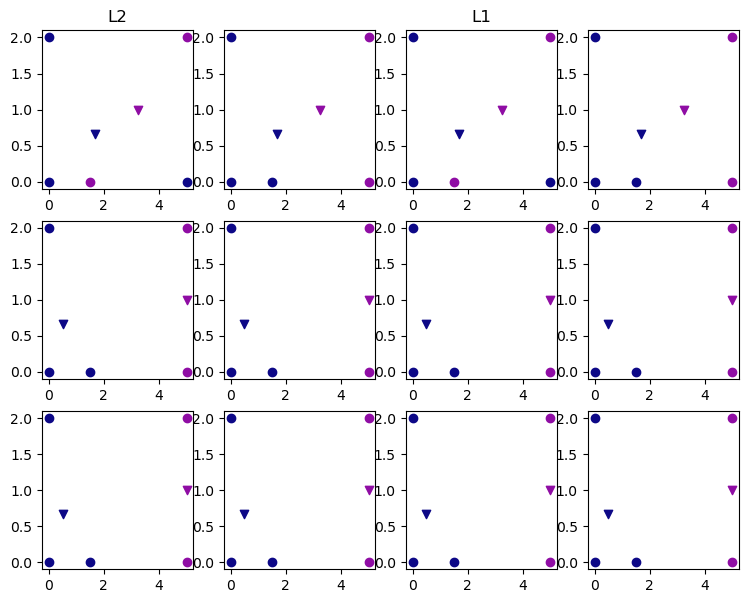

In [23]:
# Again, if you want, you can use a bit of Python
X = np.array([
    [0, 0, 1.5, 5, 5],
    [2, 0,   0, 0, 2]
    ]).T 

# K-means
colormap = cm.get_cmap('plasma')
colors = colormap([0., 0.3, 0.6])
iterations = 3

def plot(ax, i, j, X, mu, clusters):
    K = np.max(clusters)+1
    for k in range(K):
        ax[i,j].scatter(*(X[clusters==k].T), c=[colors[k]])
        ax[i,j].scatter([mu[k,0]], [mu[k,1]], c=[colors[k]], marker='v')

def kmeans(dist_fn, minimize_fn, axes, iterations=3, k=2):
    clusters = np.array([0, 0, 1, 0, 1])
    for i in range(iterations):
        mu       = np.array([minimize_fn(X[clusters==i], axis=0) for i in range(k)])
        plot(axes, i, 0, X, mu, clusters)
        
        dists = np.array([[dist_fn(mui, x) for mui in mu] for x in X])
        clusters = np.argmin(dists, axis=1)
        plot(axes, i, 1, X, mu, clusters)

L2_norm = lambda x, y: np.sqrt(((x - y)**2).sum())
L1_norm = lambda x, y: np.sum(np.abs(x-y))

fig, ax  = plt.subplots(iterations, 4, figsize=(9,7))
ax[0,0].set_title("L2")
ax[0,2].set_title("L1")

kmeans(L2_norm, np.mean, ax[:,:2])
kmeans(L1_norm, np.mean, ax[:,2:])

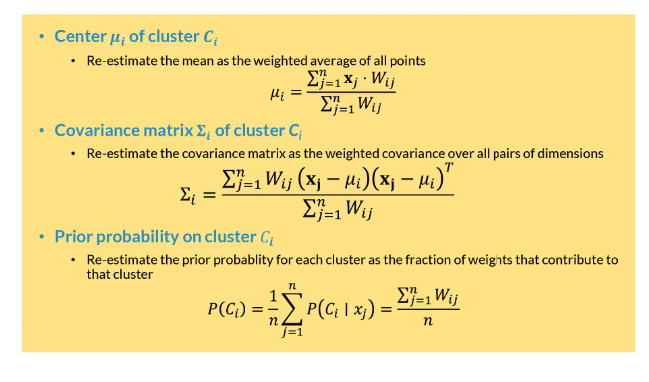

$\mu_i = \frac{\sum_{j=1}^N w_{ij}x_i}{\sum_{j=1}^N w_{ij}}$


In [85]:
# Gaussian mixtures
# Again, if you want, you can use a bit of Python
X = np.array([
    [0, 0, 1.5, 5, 5],
    [2, 0,   0, 0, 2]
    ]).T
n, d = X.shape
k = 2

P_C_given_X = np.ones((n, k, 1)) * 0.5  
print(f'P_C_given_X:\n {P_C_given_X}')

sum_of_P_C_given_X = P_C_given_X.sum(axis=0) 
print(f'sum_of_P_C_given_X:\n {sum_of_P_C_given_X}')

X = X.reshape((n, 1, d))                 
X_mult_P_C_given_X = X * P_C_given_X  
print(f'X_mult_P_C_given_X:\n {X_mult_P_C_given_X}')

mu = X_mult_P_C_given_X.sum(0) / sum_of_P_C_given_X                       
print("Means: \n", mu)

P_C_given_X:
 [[[0.5]
  [0.5]]

 [[0.5]
  [0.5]]

 [[0.5]
  [0.5]]

 [[0.5]
  [0.5]]

 [[0.5]
  [0.5]]]
sum_of_P_C_given_X:
 [[2.5]
 [2.5]]
X_mult_P_C_given_X:
 [[[0.   1.  ]
  [0.   1.  ]]

 [[0.   0.  ]
  [0.   0.  ]]

 [[0.75 0.  ]
  [0.75 0.  ]]

 [[2.5  0.  ]
  [2.5  0.  ]]

 [[2.5  1.  ]
  [2.5  1.  ]]]
Means: 
 [[2.3 0.8]
 [2.3 0.8]]


$\sum C_i = \frac{\sum_{j=1}^N w_{ij} (x_j-\mu_i)(x_j-\mu_i)^T}{\sum_{j=1}^N w_{ij}}$

In [91]:
mu = mu.reshape((1, k, d))               
X_minum_mu = X - mu                           
sqrtW_X_minum_mu = (X_minum_mu * np.sqrt(P_C_given_X)).reshape(n, k, d, 1)
outer = (sqrtW_X_minum_mu @ sqrtW_X_minum_mu.reshape(n, k, 1, d))  

Cov = outer.sum(0) / sum_of_P_C_given_X.reshape((k,1,1)) 
mu = mu.reshape(k,d)
print()
print("Covariance: \n", Cov)


Covariance: 
 [[[5.16 0.  ]
  [0.   0.96]]

 [[5.16 0.  ]
  [0.   0.96]]]


$P(C_i) = \frac{\sum_{j=1}^n w_{ij}}{n}$

In [97]:
Prior_C = (P_C_given_X.sum(0)/n).reshape(-1)
print()
print(f'P(C)={Prior_C}')


P(C)=[0.5 0.5]


$P(C_i|\mathbf{x})=\frac{P(\mathbf{x}|C_i)P(C_i)}{\sum_{i=1}^{k}P(\mathbf{x}|C_i)P(C_i)}$

In [98]:
print("Posterior:")
P = np.zeros((5, 2))
for i in range(2):
    P[:,i] = GMM.prob(X, mu[i], Cov[i])*Pri[i]
print(P / P.sum(axis=1, keepdims=True))

Posterior:
[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


EM may get stuck in (local) minimums. In this single step nothing changed from the initialization of $P(C_i | x_{j}) = 0.5$.

# Optionals
## Exercise 7
Consider 2D data (2,2), (2,1), (2,3), (1,2), (3,2), (8,2), (8,1), (8,0), (8,3), (8,4), (7,2), (6,2), (9,2), (10,2), (7,1), (7,3), (9,1), (9,3)  

![Data plotted](graphics/two_cluster_dataplot.png)

/Users/au711141/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


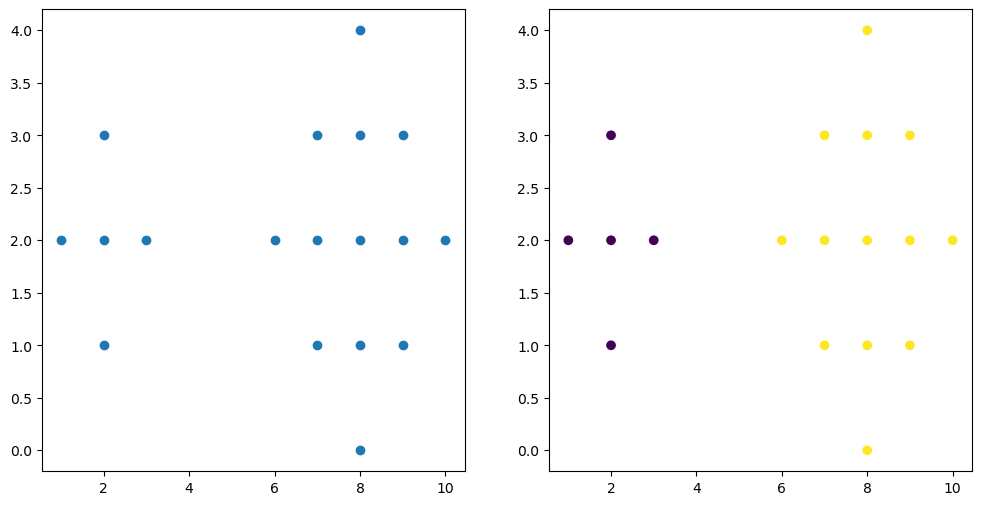

In [31]:
points = np.array([
    (2,2), (2,1), (2,3), (1,2), (3,2), (8,2), (8,1), (8,0), (8,3), (8,4), (7,2), (6,2), (9,2), (10,2), (7,1), (7,3), (9,1), (9,3) 
])
fig = plt.figure(figsize=(12,6))
ax  = fig.add_subplot(121)
ax.scatter(*(points.T))

from sklearn.cluster import k_means
_, labels, *_ = k_means(points, n_clusters=2, init = np.array([(8,1),(8,3)]))
ax = fig.add_subplot(122)
ax.scatter(*(points.T), c=labels)

plt.show()


- Let k=2 and sketch visually what you think the final clustering will be and explain why. 
- Does the initialization influence the final clustering? And why?

## Exercise 8: K-means and the Iris dataset

In this exercise, we will apply K-means to the two 2PC dataset from [Zaki] (and slides from Week 2).
You may use the code below as inspiration.

2 150


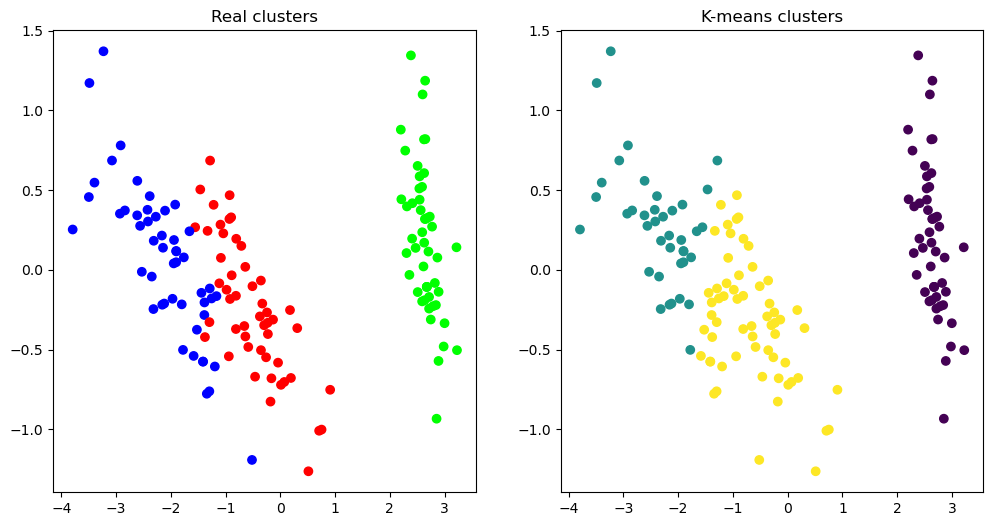

In [15]:
X, y = load_iris_PC()
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(*(X.T), c=y)
ax[0].set_title("Real clusters")


def kmeans(X,k):
    """
        Arguments:
            k: int specifying number of clusters
        Returns:
            clusters: Array of indicators (ints) indicating the cluster of each point. Shape: [n,]
    """
    n, d = X.shape
    clusters = np.zeros((n,))
    new_clusters=np.ones((n,))
    centroids = np.random.randn(k, d) # K clusters of shape d
    
    while clusters is None or (not np.allclose(clusters, new_clusters)):
        clusters = new_clusters
        new_clusters = np.argmin([[L2_norm(X[i], centroids[j]) for j in range(k)] for i in range(n)], axis=1) # assign points to clusters
        centroids = [np.mean(X[np.where(new_clusters==i)], axis=0) for i in range(k)] # reassign centroids
    return clusters

clusters = kmeans(X,k=3)
print(*(X.T).shape) #unpacking
ax[1].scatter(*(X.T), c=clusters)
ax[1].set_title("K-means clusters")
plt.show()

Note how two cluster are close and appear to have a small overlap. EM may be better to represent the clusters in this case.